# test non lineaire

In [284]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
from loss import *
from activation import *


In [285]:
# Définir les paramètres d'entrée et de sortie
input_size = 2
hidden_size = 2
output_size = 1

# Définir les données d'entraînement
X, Y = gen_arti(data_type=1)
Y = np.where(Y == -1, 0, Y)

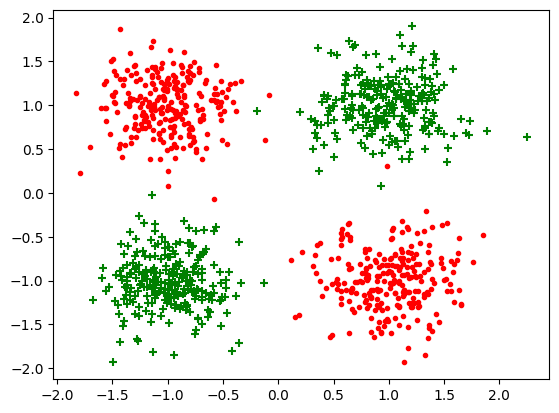

In [286]:
plot_data(X, Y)

In [287]:
# w1_biais = np.ones((input_size, hidden_size))
# linear1 = Linear(input_size, hidden_size, w=w1_biais)
# tanh = TanH()
# w2 = np.asarray([1.0,-2.0]).reshape(hidden_size, output_size)
# linear2 = Linear(hidden_size, output_size, w=w2)
# sigmoid = Sigmoid()
# mse_loss = MSELoss()

In [288]:
# w1_biais

In [289]:
# w_test = np.vstack((w1_biais, np.ones((1, hidden_size))))
# w_test

In [290]:
linear1 = Linear(input_size, hidden_size)

tanh = TanH()
linear2 = Linear(hidden_size, output_size)
sigmoid = Sigmoid()
mse_loss = MSELoss()
ce_loss = CrossEntropyLoss()
loss_list = []

In [291]:
# Boucle d'entraînement
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    l1 = linear1.forward(X)
    tan = tanh.forward(l1)
    l2 = linear2.forward(tan)
    yhat = sigmoid.forward(l2)

    # Calculer la perte
    loss = mse_loss.forward(Y, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, loss.mean()))
    loss_list.append(loss.mean())

    # Backward pass
    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)
    delta = mse_loss.backward(Y, yhat)
    delta = sigmoid.backward_delta(l2, delta)
    linear2.backward_update_gradient(tan, delta)
    delta = linear2.backward_delta(tan, delta)
    delta = tanh.backward_delta(l1, delta)
    linear1.backward_update_gradient(X, delta)

    # Mettre à jour les paramètres
    linear1.update_parameters(0.01)
    linear2.update_parameters(0.01)

    # Remettre à zéro les gradients
    linear1.zero_grad()
    linear2.zero_grad()
print(np.where(np.round(yhat,0) ==Y,1 ,0).mean())

Epoch 0: Loss = 0.349573
Epoch 10: Loss = 0.347644
Epoch 20: Loss = 0.345725
Epoch 30: Loss = 0.343816
Epoch 40: Loss = 0.341918
Epoch 50: Loss = 0.340033
Epoch 60: Loss = 0.338162
Epoch 70: Loss = 0.336305
Epoch 80: Loss = 0.334463
Epoch 90: Loss = 0.332638
Epoch 100: Loss = 0.330830
Epoch 110: Loss = 0.329040
Epoch 120: Loss = 0.327269
Epoch 130: Loss = 0.325518
Epoch 140: Loss = 0.323788
Epoch 150: Loss = 0.322078
Epoch 160: Loss = 0.320391
Epoch 170: Loss = 0.318727
Epoch 180: Loss = 0.317086
Epoch 190: Loss = 0.315468
Epoch 200: Loss = 0.313875
Epoch 210: Loss = 0.312306
Epoch 220: Loss = 0.310763
Epoch 230: Loss = 0.309245
Epoch 240: Loss = 0.307753
Epoch 250: Loss = 0.306287
Epoch 260: Loss = 0.304847
Epoch 270: Loss = 0.303434
Epoch 280: Loss = 0.302047
Epoch 290: Loss = 0.300687
Epoch 300: Loss = 0.299353
Epoch 310: Loss = 0.298046
Epoch 320: Loss = 0.296766
Epoch 330: Loss = 0.295513
Epoch 340: Loss = 0.294286
Epoch 350: Loss = 0.293085
Epoch 360: Loss = 0.291911
Epoch 370: L

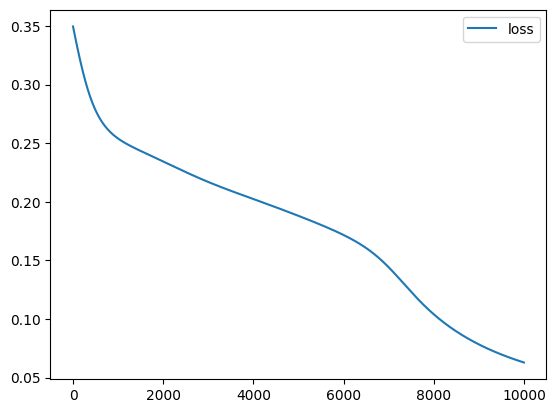

In [292]:
plt.plot(loss_list, label='loss')
plt.legend()
plt.show()

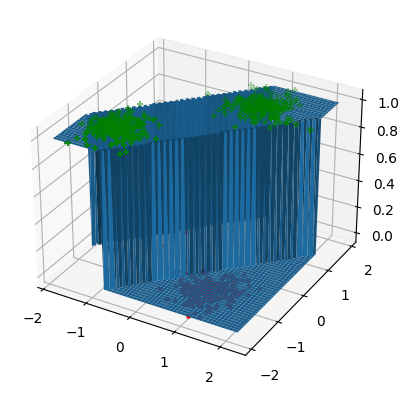

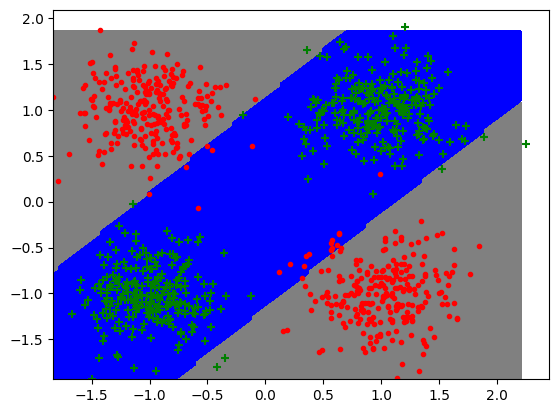

In [293]:
# Afficher les résultats
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plot_frontiere_3d(
    ax,
    X,
    lambda x: np.round(sigmoid.forward(linear2.forward(tanh.forward(linear1.forward(x)))), 0),
    step=100,
)

plot_data_3d(ax, X, Y)

plt.show()

plot_frontiere(
    X,
    lambda x: np.round(sigmoid.forward(linear2.forward(tanh.forward(linear1.forward(x)))), 0),
    step=100,
)

plot_data(X, Y)
plt.show()


### without biais 

In [294]:
linear1 = Linear(input_size, hidden_size,biais=False)
tanh = TanH()
linear2 = Linear(hidden_size, output_size,biais=False)
sigmoid = Sigmoid()
mse_loss = MSELoss()
ce_loss = CrossEntropyLoss()
loss_list = []

In [295]:
# Boucle d'entraînement
num_epochs = 50000
for epoch in range(num_epochs):
    # Forward pass
    l1 = linear1.forward(X)
    tan = tanh.forward(l1)
    l2 = linear2.forward(tan)
    yhat = sigmoid.forward(l2)

    # Calculer la perte
    loss = mse_loss.forward(Y, yhat)
    if epoch % 10 == 0:
        print("Epoch %d: Loss = %f" % (epoch, loss.mean()))
       
    loss_list.append(loss.mean())
    # Backward pass
    delta = mse_loss.backward(Y, yhat)
    delta = sigmoid.backward_delta(l2, delta)
    

    # print(tan.shape)
    # print(delta.shape)
    # print(linear2._gradient.shape)

    linear2.backward_update_gradient(tan, delta)
    delta = linear2.backward_delta(tan, delta)
    delta = tanh.backward_delta(l1, delta)
    linear1.backward_update_gradient(X, delta)

    # Mettre à jour les paramètres
    linear1.update_parameters()
    linear2.update_parameters()

    # Remettre à zéro les gradients
    linear1.zero_grad()
    linear2.zero_grad()

Epoch 0: Loss = 0.296482
Epoch 10: Loss = 0.296432
Epoch 20: Loss = 0.296382
Epoch 30: Loss = 0.296333
Epoch 40: Loss = 0.296283
Epoch 50: Loss = 0.296234
Epoch 60: Loss = 0.296184
Epoch 70: Loss = 0.296135
Epoch 80: Loss = 0.296086
Epoch 90: Loss = 0.296036
Epoch 100: Loss = 0.295987
Epoch 110: Loss = 0.295938
Epoch 120: Loss = 0.295889
Epoch 130: Loss = 0.295839
Epoch 140: Loss = 0.295790
Epoch 150: Loss = 0.295741
Epoch 160: Loss = 0.295692
Epoch 170: Loss = 0.295643
Epoch 180: Loss = 0.295594
Epoch 190: Loss = 0.295545
Epoch 200: Loss = 0.295496
Epoch 210: Loss = 0.295447
Epoch 220: Loss = 0.295398
Epoch 230: Loss = 0.295349
Epoch 240: Loss = 0.295300
Epoch 250: Loss = 0.295252
Epoch 260: Loss = 0.295203
Epoch 270: Loss = 0.295154
Epoch 280: Loss = 0.295105
Epoch 290: Loss = 0.295057
Epoch 300: Loss = 0.295008
Epoch 310: Loss = 0.294960
Epoch 320: Loss = 0.294911
Epoch 330: Loss = 0.294862
Epoch 340: Loss = 0.294814
Epoch 350: Loss = 0.294766
Epoch 360: Loss = 0.294717
Epoch 370: L

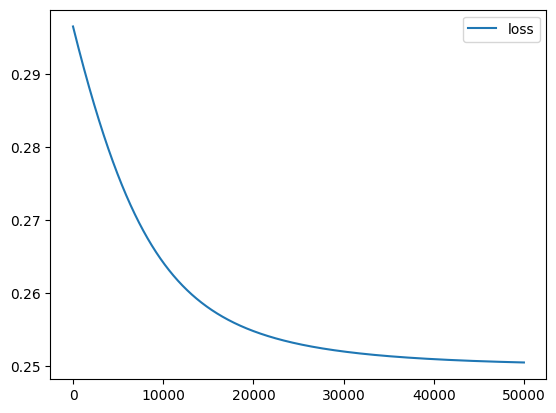

In [296]:
plt.plot(loss_list, label='loss')
plt.legend()
plt.show()

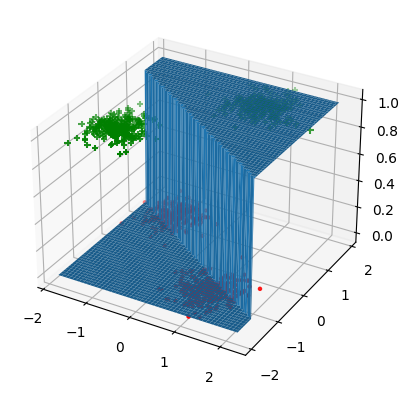

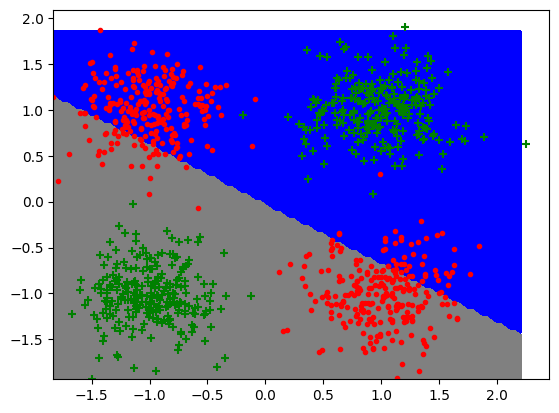

In [297]:
# Afficher les résultats
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plot_frontiere_3d(
    ax,
    X,
    lambda x: np.round(sigmoid.forward(linear2.forward(tanh.forward(linear1.forward(x)))),0),
    step=100,
)

plot_data_3d(ax, X, Y)

plt.show()

plot_frontiere(
    X,
    lambda x: np.round(sigmoid.forward(linear2.forward(tanh.forward(linear1.forward(x)))),0),
    step=100,
)

plot_data(X, Y)
plt.show()